In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns
import sys

In [41]:
df = pd.read_csv('output.csv').drop(columns=['Unnamed: 0'])
# df = df.dropna()
# df = df.drop(df.loc[df['Reported'] == 'void'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'Void'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'VOID'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'None'].index, inplace=False)
# df = df.drop(df.loc[df['Reported'] == 'No reports'].index, inplace=False)
# df = df[~df.Reported.str.contains("No Incident Reports")]
# df['Test'] = df.Reported.str.contains(' ')
# df = df.drop(df.loc[df['Test'] == False].index, inplace=False)
# df = df.drop(columns=['Test'])

# df['Date'] = df.apply(lambda x: str(x['Reported']).split(' ')[0], axis=1)
# # df['Time'] = df.apply(lambda x: str(x['Reported']).split(' ')[1], axis=1)
# df.sort_values(by=['Reported'])

In [97]:
removed_columns = ['Unnamed: 0', 'Weeks Since Start', 'Years since start', 'Months since start',
                   'week-composite', 'month-composite', 'Day of month', 'Reported-edited', 'Week_Day',
                   'Month', 'Year']
cleaned = pd.read_csv('output-cleaned.csv').drop(columns=removed_columns)
cleaned['Date'] = pd.to_datetime(cleaned['Date'])
cleaned['Date'] = cleaned['Date'].dt.date
cleaned = cleaned[~cleaned.Incident.str.contains('Domestic')]
cleaned['Incident'] = cleaned["Incident"].str.lower()

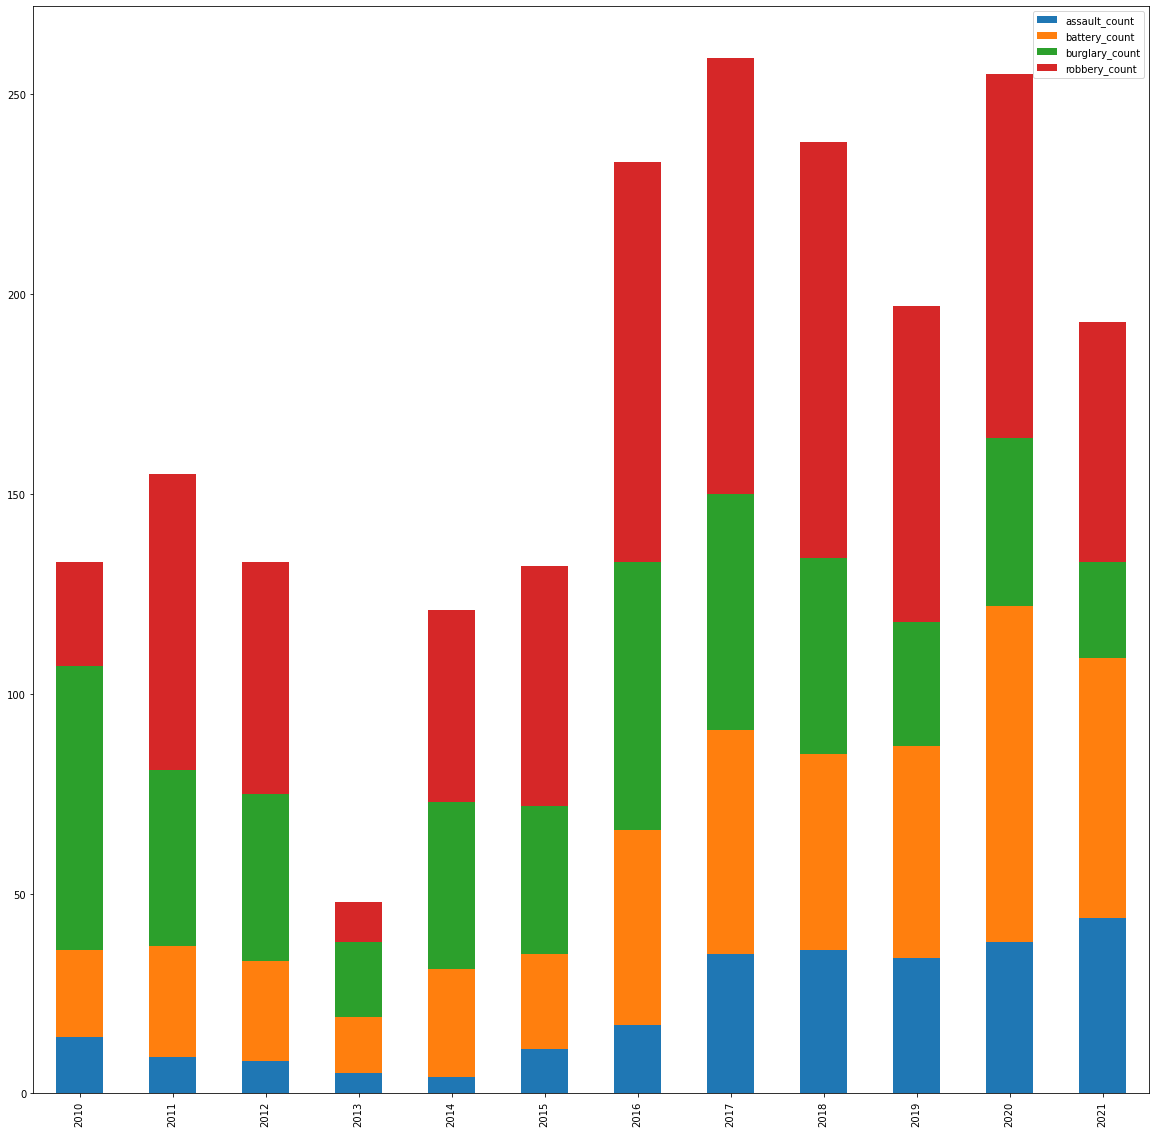

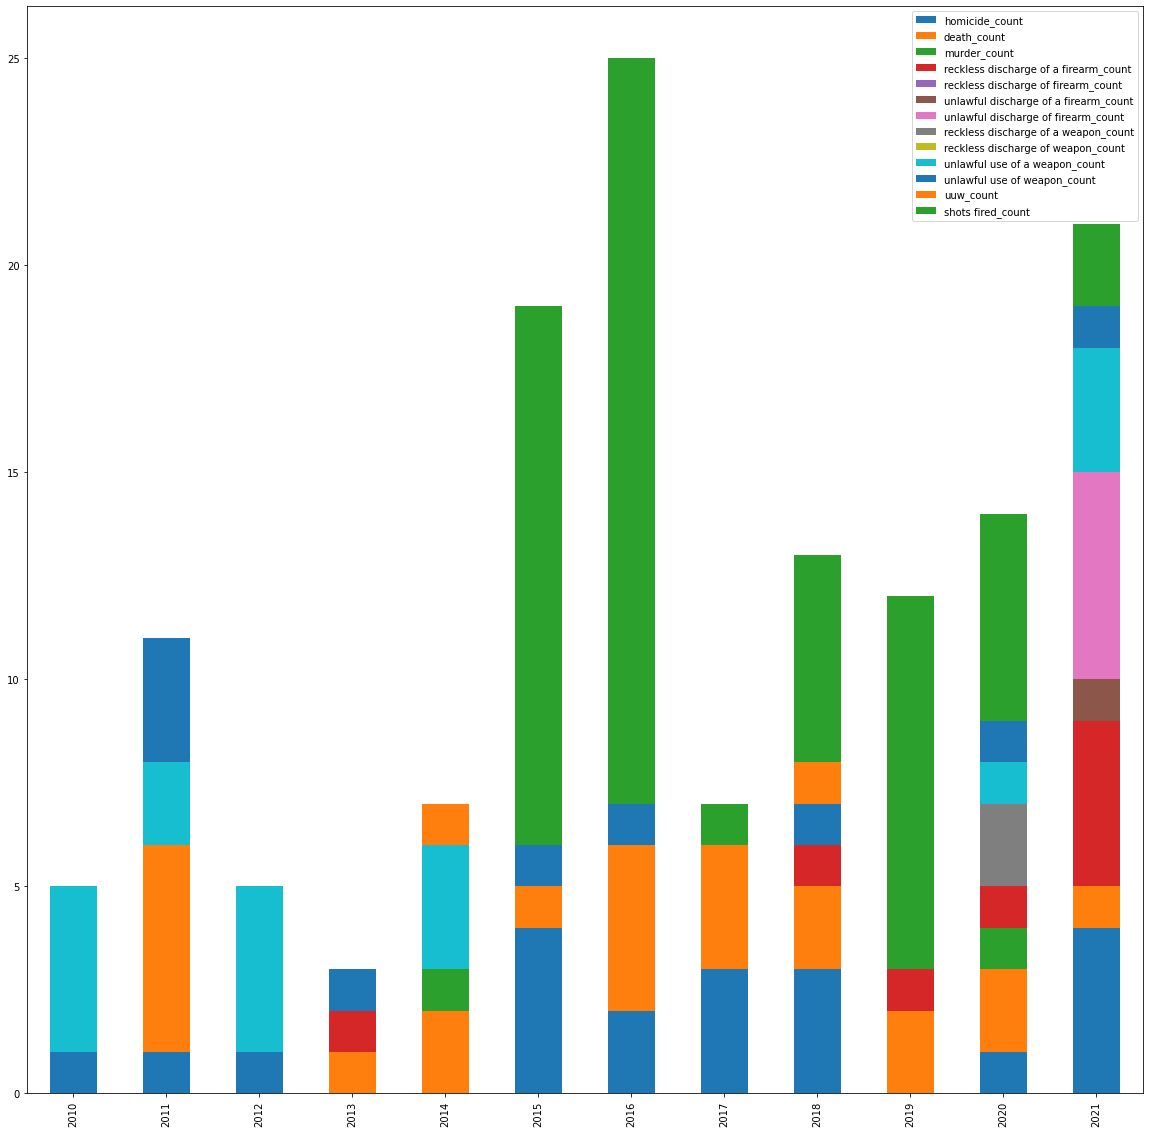

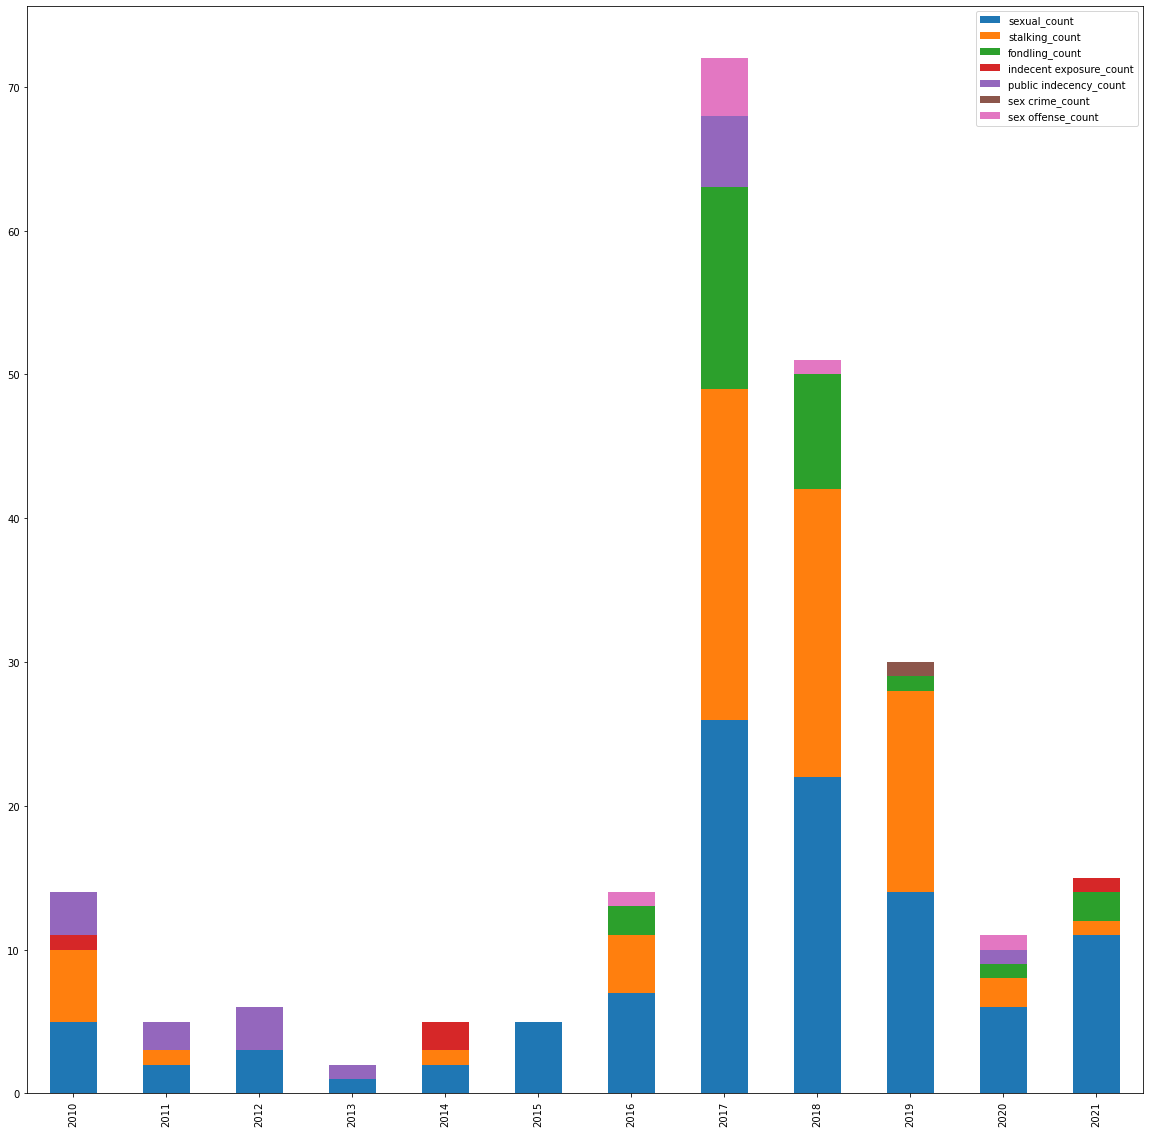

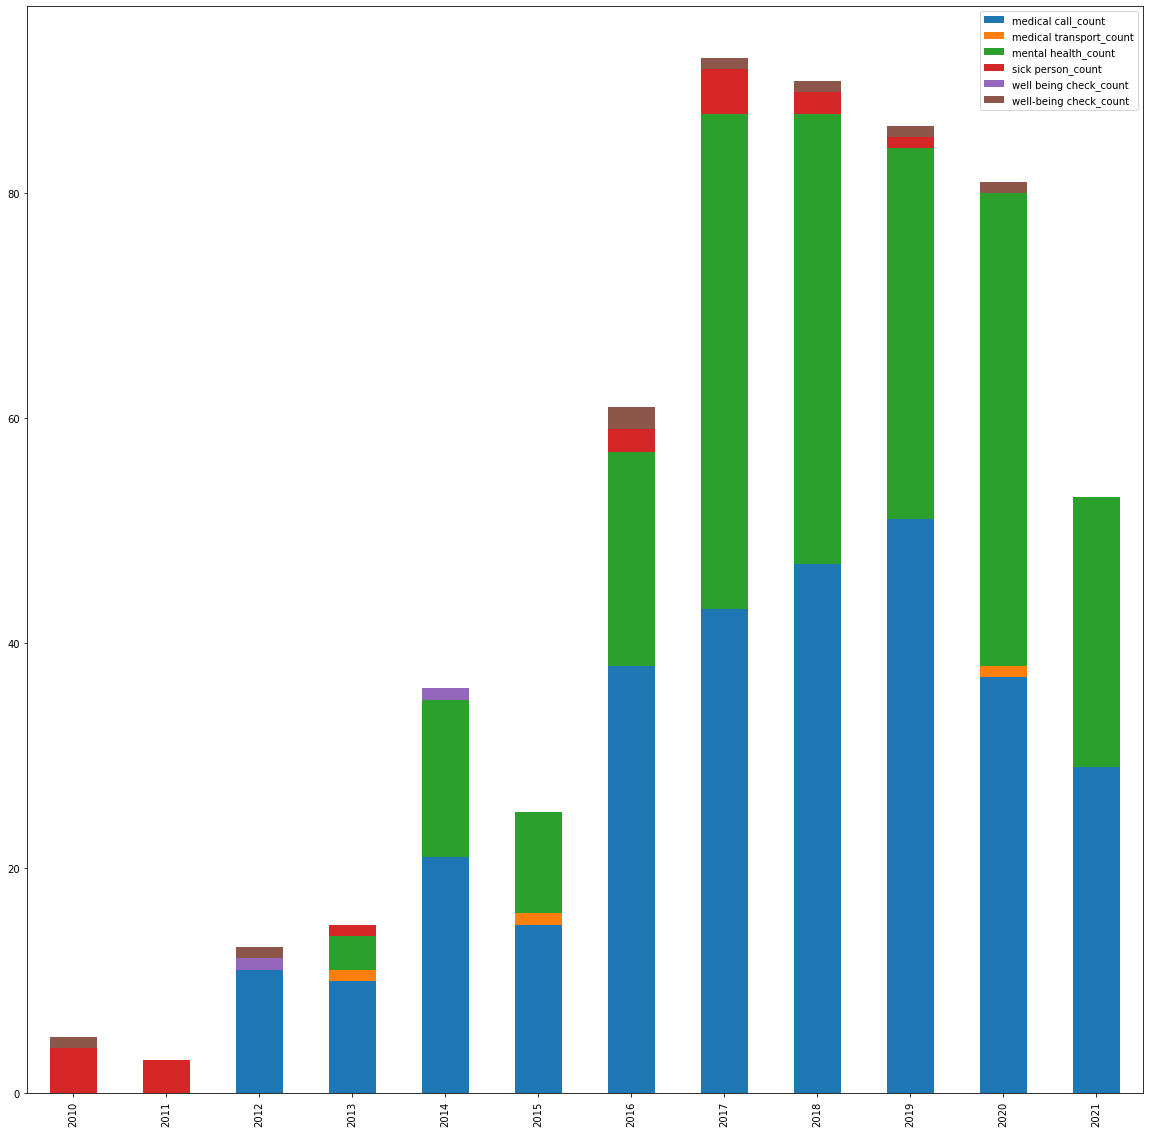

In [99]:
def plot_incidents_vs_time(df, incident):
    sdate = df['Date'].min()
    edate = df['Date'].max()
    delta = edate - sdate       # as timedelta
    days = []
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        days.append(day)
    time_data = pd.DataFrame(columns=['count'], index=days)
    time_data['count'] = 0
    subset = df[df['Incident'].str.contains(incident)]
    value_counts = subset['Date'].value_counts()
    
    prev_val = 0
    for index, row in time_data.iterrows():
        if index in value_counts.index:
            val = prev_val + value_counts[index]
        else:
            val = prev_val
        
        time_data.loc[index, 'count'] = val
        prev_val = val

    plt.plot(time_data.index, list(time_data['count']))
    
    return time_data

# plot_incidents_vs_time(cleaned, 'Battery')
# plot_incidents_vs_time(cleaned, 'Burglary')
# plot_incidents_vs_time(cleaned, 'Robbery')

def plot_incidents_barplot(df, incidents):
    sdate = df['Date'].min()
    edate = df['Date'].max()
    delta = edate - sdate       # as timedelta
    days = []
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        days.append(day)
    time_data = pd.DataFrame(0, columns=[x+'_count' for x in incidents], index=days)

    for incident in incidents:
        subset = df[df['Incident'].str.contains(incident)]
        value_counts = subset['Date'].value_counts()

        prev_val = 0
        for index, row in time_data.iterrows():
            if index in value_counts.index:
                val = prev_val + value_counts[index]
            else:
                val = prev_val

            time_data.loc[index, incident+'_count'] = val
            prev_val = val
        
    min_year = int(sdate.year)
    max_year = int(edate.year)
    years = []
    for year in range(min_year, max_year+1):
        years.append(year)
    
    year_data = pd.DataFrame(0, columns=[x+'_count' for x in incidents], index=years)
    for incident in incidents:
        subset = df[df['Incident'].str.contains(incident)]
        value_counts = subset['Date'].value_counts()
        for index, value in value_counts.iteritems():
            y = index.year
            year_data.loc[index.year, incident+'_count'] += value

    year_data.plot(kind='bar', stacked=True, figsize=(20, 20))
    plt.show()
    

    
plot_incidents_barplot(cleaned, ['assault', 'battery', 'burglary', 'robbery'])
plot_incidents_barplot(cleaned, ['homicide', 'death', 'murder',
                                 'reckless discharge of a firearm',
                                 'reckless discharge of firearm',
                                 'unlawful discharge of a firearm',
                                 'unlawful discharge of firearm',
                                 'reckless discharge of a weapon',
                                 'reckless discharge of weapon',
                                 'unlawful use of a weapon',
                                 'unlawful use of weapon',
                                 'uuw',
                                 'shots fired'])
plot_incidents_barplot(cleaned, ['sexual', 'stalking', 'fondling', 'indecent exposure', 'public indecency',
                                 'sex crime', 'sex offense'])
plot_incidents_barplot(cleaned, ['medical call', 'medical transport', 'mental health', 'sick person',
                                 'well being check', 'well-being check'])

# plot_incidents_barplot(cleaned, ['Criminal Damage to Property'])
# plot_incidents_barplot(cleaned, ['Non-Criminal'])

In [74]:
cleaned['Incident'].value_counts().head(60)

Theft                                           2814
Information                                     1129
Lost Property                                    799
Traffic Violation                                692
Found Property                                   658
Liquor Law Violation                             371
Injured Person                                   325
Theft from Motor Vehicle                         295
Burglary                                         289
Medical Call                                     275
Battery                                          272
Criminal Damage to Property                      254
Information / Armed Robbery                      236
Information / Theft                              228
Mental Health Transport                          218
Information / Burglary                           204
Assist Other Agency                              199
Traffic Crash                                    189
Information / Robbery                         